In [1]:
import requests
import pandas as pd
import csv
import os
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_columns = ["time","method","route","time_took",'ip',"status"]

def download_file():
    url = "https://dogshit.ngrok.app/"
    r = requests.get(url, allow_redirects=True)
    open('request_logs.csv', 'wb').write(r.content)

def read_csv():
    df = pd.read_csv("request_logs.csv")
    return df

In [3]:
# download_file()
df = read_csv()

# set column names
df.columns = csv_columns

# remove rows with missing values
df = df.dropna()

# convert time to datetime, sample format: 2024-03-05 14:22:03
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(by='time')
df_lite = df

linear coefficient:  2.3423065801523966e-06


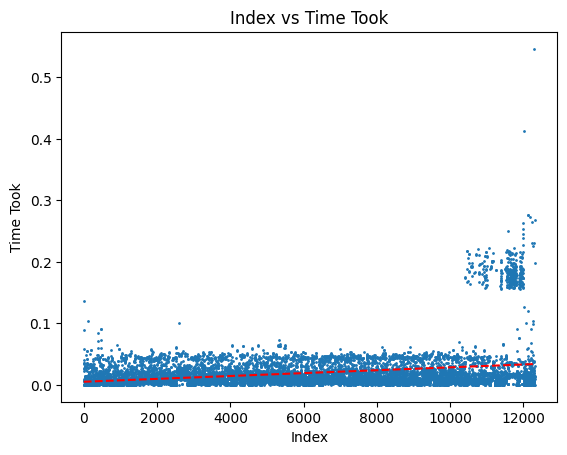

In [4]:
plt.scatter(df_lite.index, df_lite['time_took'], s=1)
plt.xlabel('Index')
plt.ylabel('Time Took')
plt.title('Index vs Time Took')

# add a trend line
z = np.polyfit(df_lite.index, df_lite['time_took'], 1)
p = np.poly1d(z)
plt.plot(df_lite.index,p(df_lite.index),"r--")

print("linear coefficient: ", z[0])

Text(0.5, 1.0, 'Boxplot of Time Took for Slowest Routes')

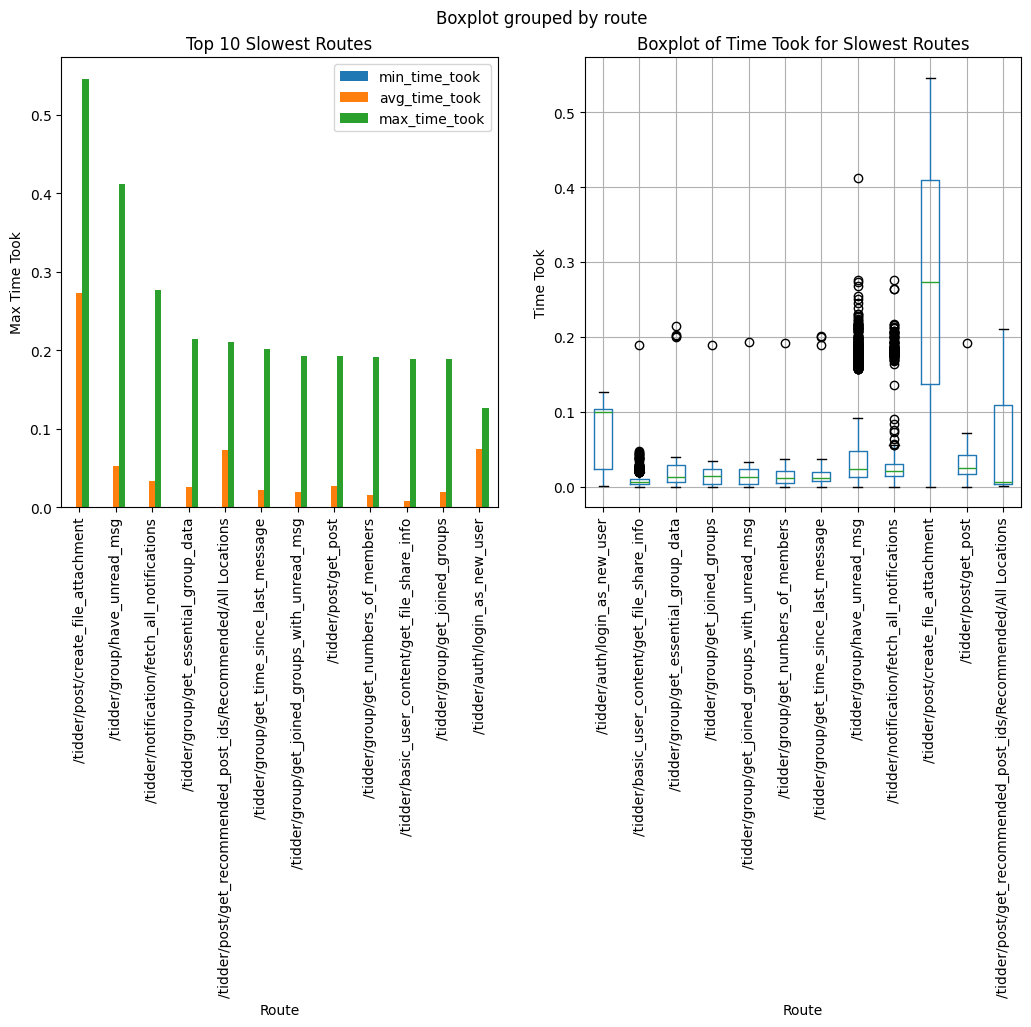

In [5]:
d = pd.DataFrame()
num_of_routes = 12
_df = df.copy()
# split the route by /, remove the digits from the end
def clean_route_name(route):
    elements = route.split('/')
    elements = [e for e in elements if not e.isnumeric()]
    return '/'.join(elements)

_df['route'] = _df['route'].apply(clean_route_name)

d['min_time_took'] = _df.groupby('route')['time_took'].min()
d['avg_time_took'] = _df.groupby('route')['time_took'].mean()
d['max_time_took'] = _df.groupby('route')['time_took'].max()
d = d.sort_values(by='max_time_took', ascending=False)
bad_routes = d.head(num_of_routes).index

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

# Plot 1: Top 10 slowest routes (bar chart)
d.head(num_of_routes).plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Route')
axes[0].set_ylabel('Max Time Took')
axes[0].set_title('Top 10 Slowest Routes')

# Plot 2: Boxplot of time took for slowest routes
_df2 = _df[_df['route'].isin(bad_routes)]
# sort the routes by the max time took
_df2.boxplot(column='time_took', by='route', rot=90, ax=axes[1])
axes[1].set_xlabel('Route')
axes[1].set_ylabel('Time Took')
axes[1].set_title('Boxplot of Time Took for Slowest Routes')

<Axes: xlabel='time'>

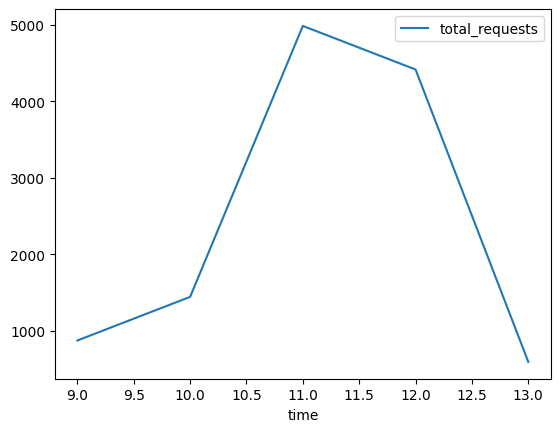

In [6]:
_df['time'] = _df['time'].dt.hour
d = pd.DataFrame()
d['total_requests'] = _df.groupby('time')['time'].count()
d.plot()